## Exercice 1

Recherchez les dates présentes dans la phrase suivante

In [1]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Ma seconde femme est morte le 10/11/1963. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

In [2]:
import re
# première étape : construction
expression = re.compile("([0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9])")
# seconde étape : recherche
res = expression.findall(texte)
print(res)

[('28/12/1903', '19'), ('08/02/1957', '19'), ('10/11/1963', '19')]


Puis dans celle-ci : 

In [3]:
texte = """Je suis né le 28/12/1903 et je suis mort le 08/02/1957. Je me suis marié le 8/5/45. 
J'ai écrit un livre intitulé 'Comprendre les fractions : les exemples en page 12/46/83' """

In [4]:
import re
# première étape : construction
expression = re.compile("([0-3]?[0-9]/[0-1]?[0-9]/([0-2][0-9])?[0-9][0-9])")
# seconde étape : recherche
res = expression.findall(texte)
print(res)

[('28/12/1903', '19'), ('08/02/1957', '19'), ('8/5/45', '')]


## Exercice 2

Nettoyer des colonnes d'un DataFrame en utilisant des expressions régulières.

La base en question contient des livres de la British Library et quelques informations les concernant. 

In [16]:
import pandas

data_books = pandas.read_csv('https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv',sep=',')

In [17]:
data_books=data_books[['Identifier', 'Place of Publication',
       'Date of Publication', 'Publisher', 'Title', 'Author']]

In [18]:
data_books[['Date of Publication',"Title"]].head(20)

,Date of Publication,Title
0,1879 [1878],Walter Forbes. [A novel.] By A. A
1,1868,All for Greed. [A novel. The dedication signed...
2,1869,Love the Avenger. By the author of “All for Gr...
3,1851,"Welsh Sketches, chiefly ecclesiastical, to the..."
4,1857,"[The World in which I live, and my place in it..."
5,1875,"[The World in which I live, and my place in it..."
6,1872,Lagonells. By the author of Darmayne (F. E. A....
7,NaN,"The Coming of Spring, and other poems. By J. A..."
8,1676,"A Warning to the inhabitants of England, and L..."
9,1679,A Satyr against Vertue. (A poem: supposed to b...


La colonne "Date de Publication" n'est pas toujours une année, il y a parfois d'autres informations. 

Le but de l'exercice est d'avoir une date de publication du livre propre.

1) La première chose à faire est de regarder la base afin de s'assurer que les opérations de regex sont cohérentes avec les informations présentes initialement. 

Pour cela, on commence par regarde le nombre d'informations manquantes (on ne pourra pas avoir mieux après la regex, et normalement on ne devrait pas avoir moins...)

In [19]:
data_books[['Date of Publication']].isna().sum()

Date of Publication    181
dtype: int64

2) on détermine la forme de la regex pour une date de publication. A priori, il y a 4 chiffres qui forment une année.

In [20]:
regex = r'([0-2][0-9][0-9][0-9])'

3) on applique notre regex à la colonne qui nous intéresse avec la fonction str.extract()

In [21]:
data_books['Cleaned Date of Publication'] = data_books['Date of Publication'].str.extract(regex,expand=True)

In [22]:
data_books.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Cleaned Date of Publication
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,1879
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",1868
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",1869
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",1851
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",1857


In [23]:
data_books[['Cleaned Date of Publication']].isna().sum()

Cleaned Date of Publication    183
dtype: int64

On a 2 Nan qui n'étaient pas présents au début de l'exercice, pourquoi ?

On vérifier que notre opération s'est bien déroulée en regardant les éléments qui ont été changés. 

In [24]:
data_books['check'] = data_books['Cleaned Date of Publication'] == data_books['Date of Publication']

In [25]:
data_books[['Date of Publication','Cleaned Date of Publication']][data_books['check'].eq(False)]

,Date of Publication,Cleaned Date of Publication
0,1879 [1878],1879
7,NaN,NaN
13,"1839, 38-54",1839
16,1860-63,1860
23,"1847, 48 [1846-48]",1847
...,...,...
8278,"1883, [1884]",1883
8279,1898-1912,1898
8283,"1831, 32",1831
8284,[1806]-22,1806


In [26]:
data_books['Cleaned Date of Publication']= pandas.to_numeric(data_books['Cleaned Date of Publication'], downcast='float')

In [27]:
data_books['Cleaned Date of Publication'].dtype

dtype('float32')

(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 5.000e+00, 3.000e+00,
        2.300e+01, 2.500e+01, 4.900e+01, 3.900e+01, 3.200e+01, 5.600e+01,
        8.100e+01, 1.470e+02, 4.100e+02, 7.230e+02, 1.182e+03, 1.858e+03,
        2.596e+03, 8.720e+02]),
 array([1510.  , 1530.25, 1550.5 , 1570.75, 1591.  , 1611.25, 1631.5 ,
        1651.75, 1672.  , 1692.25, 1712.5 , 1732.75, 1753.  , 1773.25,
        1793.5 , 1813.75, 1834.  , 1854.25, 1874.5 , 1894.75, 1915.  ],
       dtype=float32),
 <a list of 20 Patch objects>)

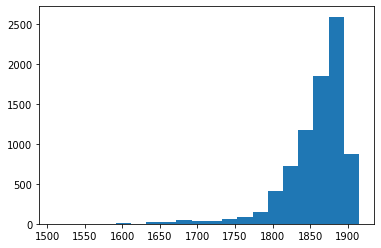

In [28]:
import matplotlib as plt
%matplotlib inline

plt.pyplot.hist(data_books['Cleaned Date of Publication'][data_books['Cleaned Date of Publication']>0],bins=20)